### Домашнее задание "Теория оптимизации".

Задание.

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

Дополнительное задание.

Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

In [1]:
import numpy as np
from scipy.optimize import differential_evolution

import matplotlib.pyplot as plt
#%matplotlib inline

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [3]:
result.x, result.fun  # минимум функции

(array([0., 0.]), 4.440892098500626e-16)

In [25]:
#x[0] = np.random.randint(-5, 5, 1)   # Функция Экли  -5 <= x, y <= 5
#x[1] = np.random.randint(-5, 5, 1)
x = np.linspace(-5, 5, 2)
fx = ackley(x)

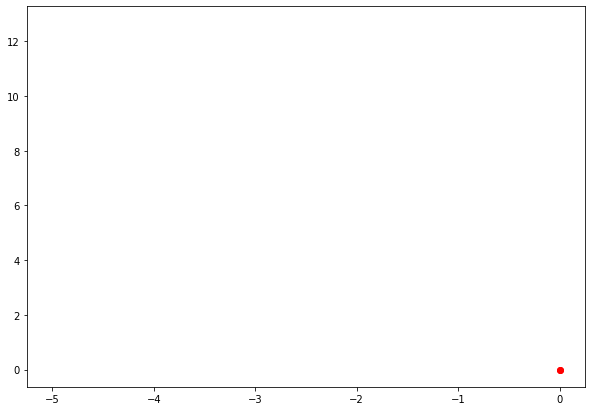

In [91]:
plt.figure(figsize=(10,7))
plt.plot(x[0], x[1], fx)
plt.plot([result.x], [result.fun], 'ro')
plt.show()

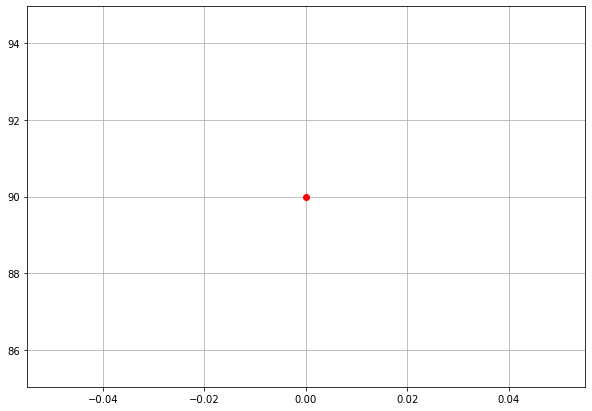

In [34]:
plt.figure(figsize=(10,7))
plt.plot([result.nit], 'ro')
plt.grid()
plt.show()

### Выбор стратегии
Выбор стратегии влияет на количество итераций (nit) и оценок (nfev)

In [4]:
result2 = differential_evolution(ackley, bounds, strategy='best1bin', seed=42)  # strategy='best1bin' по умолчанию
result2

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [7]:
result3 = differential_evolution(ackley, bounds, strategy='best1exp', seed=42)
result3

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 4503
     nit: 147
 success: True
       x: array([0., 0.])

In [8]:
result4 = differential_evolution(ackley, bounds, strategy='rand1exp', seed=42)
result4

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 7473
     nit: 246
 success: True
       x: array([0., 0.])

In [9]:
result5 = differential_evolution(ackley, bounds, strategy='randtobest1exp', seed=42)
result5

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 4773
     nit: 156
 success: True
       x: array([0., 0.])

In [11]:
result6 = differential_evolution(ackley, bounds, strategy='currenttobest1exp', seed=42)
result6

     fun: 4.440892098500626e-16
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 30093
     nit: 1000
 success: False
       x: array([0., 0.])

In [12]:
result7 = differential_evolution(ackley, bounds, strategy='best2exp', seed=42)
result7

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 7413
     nit: 244
 success: True
       x: array([0., 0.])

In [13]:
result8 = differential_evolution(ackley, bounds, strategy='rand2exp', seed=42)
result8

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 10323
     nit: 341
 success: True
       x: array([0., 0.])

In [14]:
result9 = differential_evolution(ackley, bounds, strategy='randtobest1bin', seed=42)
result9

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 3123
     nit: 101
 success: True
       x: array([0., 0.])

In [15]:
result10 = differential_evolution(ackley, bounds, strategy='currenttobest1bin', seed=42)
result10

     fun: 4.440892098500626e-16
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 30093
     nit: 1000
 success: False
       x: array([0., 0.])

In [16]:
result11 = differential_evolution(ackley, bounds, strategy='best2bin', seed=42)
result11

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 5073
     nit: 166
 success: True
       x: array([0., 0.])

In [17]:
result12 = differential_evolution(ackley, bounds, strategy='rand2bin', seed=42)
result12

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 7053
     nit: 232
 success: True
       x: array([0., 0.])

In [18]:
result13 = differential_evolution(ackley, bounds, strategy='rand1bin', seed=42)
result13

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 5133
     nit: 168
 success: True
       x: array([0., 0.])

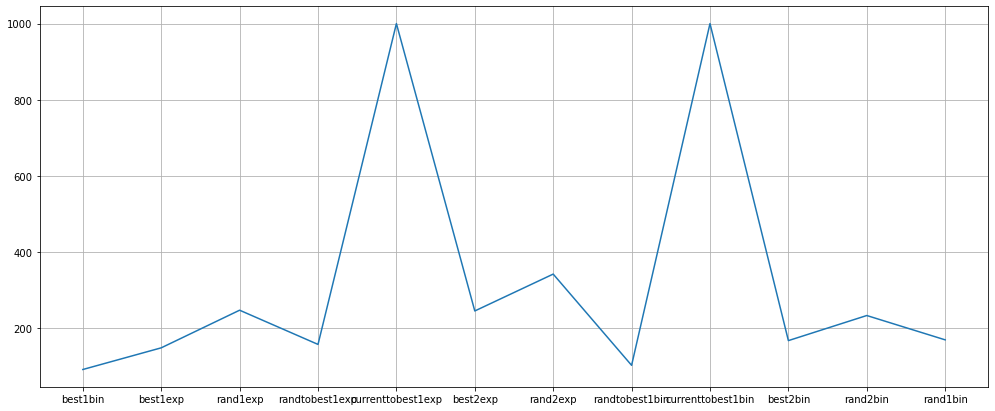

In [74]:
strategy = ['best1bin','best1exp','rand1exp','randtobest1exp','currenttobest1exp','best2exp','rand2exp','randtobest1bin','currenttobest1bin','best2bin','rand2bin','rand1bin']
result.nit = [90, 147, 246, 156, 1000, 244, 341, 101, 1000, 166, 232, 168]
plt.figure(figsize=(17,7))
#plt.plot(strategy)
#plt.plot(result.nit)
plt.plot(strategy, result.nit)
plt.grid()
plt.show()

In [92]:
min_result_nit_strategy = 'best1bin'

### Выбор popsize (максимальный размер популяции)
Множитель для установки общей численности населения

popsize * len(x)

Слишком большой размер популяции может привести к ситуации, когда число итераций будет недостаточно для нахождения глобального экстремума

In [97]:
result = differential_evolution(ackley, bounds, popsize=0, seed=42)    # изменилась точка экстремума, ушло схождение
result

     fun: 2.5799275570298907
     jac: array([-7.10542736e-07, -1.06581410e-06])
 message: 'Optimization terminated successfully.'
    nfev: 103
     nit: 7
 success: True
       x: array([-1.10958553e-08,  9.52166521e-01])

In [56]:
result = differential_evolution(ackley, bounds, popsize=5, seed=42)    # с popsize=5 x([0., 0.])
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 1073
     nit: 100
 success: True
       x: array([0., 0.])

In [71]:
result = differential_evolution(ackley, bounds, popsize=6, seed=42) 
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 1263
     nit: 99
 success: True
       x: array([0., 0.])

In [68]:
result = differential_evolution(ackley, bounds, popsize=7, seed=42) 
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 1295
     nit: 87
 success: True
       x: array([0., 0.])

In [63]:
result = differential_evolution(ackley, bounds, popsize=8, seed=42) 
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 1631
     nit: 97
 success: True
       x: array([0., 0.])

In [64]:
result = differential_evolution(ackley, bounds, popsize=9, seed=42)    
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 1899
     nit: 101
 success: True
       x: array([0., 0.])

In [65]:
result = differential_evolution(ackley, bounds, popsize=10, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2023
     nit: 97
 success: True
       x: array([0., 0.])

In [62]:
result = differential_evolution(ackley, bounds, popsize=13, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2585
     nit: 96
 success: True
       x: array([0., 0.])

In [35]:
result = differential_evolution(ackley, bounds, popsize=15, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [72]:
result = differential_evolution(ackley, bounds, popsize=40, seed=42)  # растет количество вычислений nfev
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 7983
     nit: 98
 success: True
       x: array([0., 0.])

In [38]:
result = differential_evolution(ackley, bounds, popsize=100, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 20463
     nit: 101
 success: True
       x: array([0., 0.])

In [48]:
result = differential_evolution(ackley, bounds, popsize=500, seed=42)    # сильно выросло количество вычислений nfev
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 98063
     nit: 97
 success: True
       x: array([0., 0.])

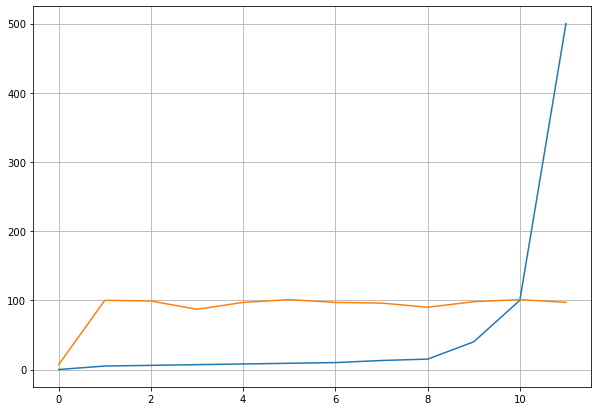

In [105]:
popsize = [0, 5, 6, 7, 8, 9, 10, 13, 15, 40, 100, 500]
result.nit = [7, 100, 99, 87, 97, 101, 97, 96, 90, 98, 101, 97]
plt.figure(figsize=(10,7))
plt.plot(popsize)
plt.plot(result.nit)
#plt.plot([popsize], [result.nit], 'ro')
plt.grid()
plt.show()

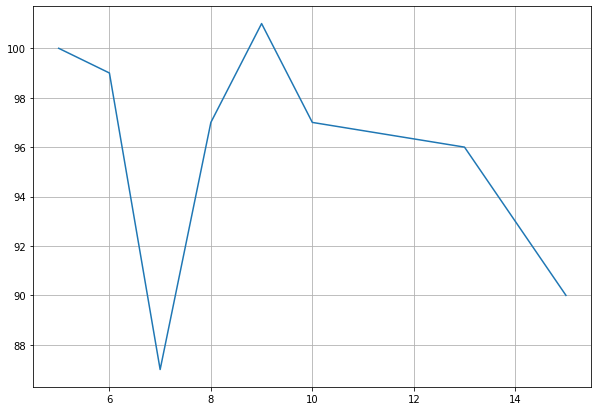

In [100]:
popsize = [5, 6, 7, 8, 9, 10, 13, 15]
result.nit = [100, 99, 87, 97, 101, 97, 96, 90]
plt.figure(figsize=(10,7))
#plt.plot(popsize)
#plt.plot(result.nit)
plt.plot(popsize, result.nit)
plt.grid()
plt.show()

In [101]:
min_result_nit_popsize = 7

### Выбор tol
Относительная погрешность

In [74]:
result = differential_evolution(ackley, bounds, tol=1e-10, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [75]:
result = differential_evolution(ackley, bounds, tol=1e-6, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [81]:
result = differential_evolution(ackley, bounds, tol=0.1, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [85]:
result = differential_evolution(ackley, bounds, tol=0.3, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [89]:
result = differential_evolution(ackley, bounds, tol=0.4, seed=42)   # при большой погрешности смещение экстремума
result

     fun: 2.5799275570298943
     jac: array([ 1.77635684e-06, -7.10542732e-07])
 message: 'Optimization terminated successfully.'
    nfev: 114
     nit: 1
 success: True
       x: array([2.40910518e-08, 9.52166530e-01])

In [79]:
result = differential_evolution(ackley, bounds, tol=0.5, seed=42)
result

     fun: 2.5799275570298943
     jac: array([ 1.77635684e-06, -7.10542732e-07])
 message: 'Optimization terminated successfully.'
    nfev: 114
     nit: 1
 success: True
       x: array([2.40910518e-08, 9.52166530e-01])

In [80]:
result = differential_evolution(ackley, bounds, tol=1, seed=42)
result

     fun: 2.5799275570298943
     jac: array([ 1.77635684e-06, -7.10542732e-07])
 message: 'Optimization terminated successfully.'
    nfev: 114
     nit: 1
 success: True
       x: array([2.40910518e-08, 9.52166530e-01])

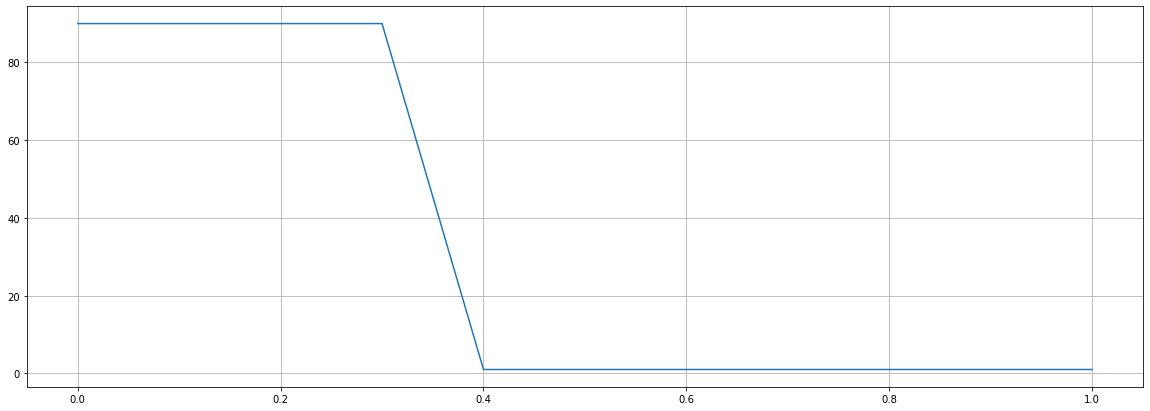

In [108]:
tol = [1e-10, 1e-6, 0.1, 0.3, 0.4, 0.5, 1]
result.nit = [90, 90, 90, 90, 1, 1, 1]
plt.figure(figsize=(20,7))
#plt.plot(tol)
#plt.plot(result.nit)
plt.plot(tol, result.nit)
plt.grid()
plt.show()

min_result_nit_tol = [-1e-... , 0.3]

### Выбор mutation (константа мутации)
Обознаяается буквой F. 

F[0,2] - если одно число

Увеличение F увеличивает радиус поиска, но замедляет сходимость.

Для силы мутации F разумные значения выбираются из отрезка [0.4, 1.0], причем хорошим начальным значением будет 0.5, 
но при быстром вырождении популяции вдали от решения следует увеличить параметр F.

In [119]:
result = differential_evolution(ackley, bounds, mutation=0.2, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 933
     nit: 28
 success: True
       x: array([0., 0.])

In [121]:
result = differential_evolution(ackley, bounds, mutation=0.4, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 1503
     nit: 47
 success: True
       x: array([0., 0.])

In [116]:
result = differential_evolution(ackley, bounds, mutation=0.5, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 1803
     nit: 57
 success: True
       x: array([0., 0.])

In [92]:
result = differential_evolution(ackley, bounds, mutation=(0.5, 1), seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [100]:
result = differential_evolution(ackley, bounds, mutation=0.9, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 4203
     nit: 137
 success: True
       x: array([0., 0.])

In [96]:
result = differential_evolution(ackley, bounds, mutation=1.8, seed=42)   # ушло схождение
result

     fun: 6.236833272055264e-11
     jac: array([ 2.82329538, -2.82833028])
 message: 'Optimization terminated successfully.'
    nfev: 7428
     nit: 245
 success: True
       x: array([ 3.88188147e-12, -2.17059448e-11])

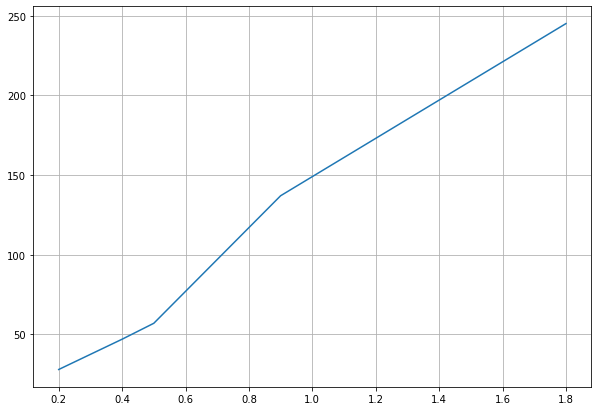

In [124]:
mutation = [0.2, 0.4, 0.5, 0.9, 1.8]
result.nit = [28, 47, 57, 137, 245]
plt.figure(figsize=(10,7))
#plt.plot(mutation)
#plt.plot(result.nit)
plt.plot(mutation, result.nit)
plt.grid()
plt.show()

In [125]:
min_result_nit_mutation = 0.2

### Выбор recombination (вероятность кроссовера CR)
Должна быть в диапазоне [0, 1] 

Увеличение этого значения позволяет большему количеству мутантов перейти в следующее поколение, но с риском стабильности популяции

In [105]:
result = differential_evolution(ackley, bounds, recombination = 0., seed=42) 
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 3423
     nit: 111
 success: True
       x: array([0., 0.])

In [106]:
result = differential_evolution(ackley, bounds, recombination = 0.5, seed=42) 
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 3303
     nit: 107
 success: True
       x: array([0., 0.])

In [103]:
result = differential_evolution(ackley, bounds, recombination = 0.9, seed=42) 
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2643
     nit: 85
 success: True
       x: array([0., 0.])

In [107]:
result = differential_evolution(ackley, bounds, recombination = [0.5, 0.9], seed=42) 
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 3003
     nit: 97
 success: True
       x: array([0., 0.])

In [128]:
result = differential_evolution(ackley, bounds, recombination = 1, seed=42) 
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2553
     nit: 82
 success: True
       x: array([0., 0.])

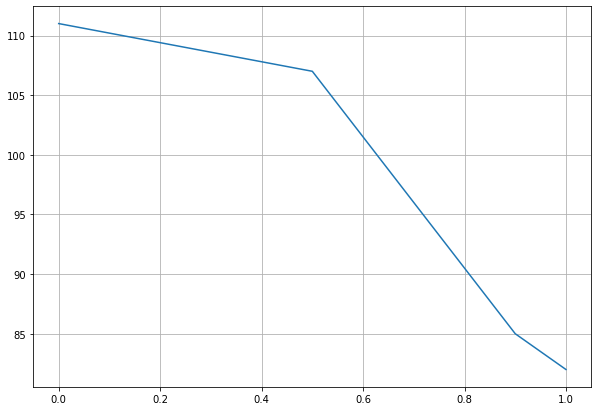

In [129]:
recombination = [0, 0.5, 0.9, 1]
result.nit = [111, 107, 85, 82]
plt.figure(figsize=(10,7))
#plt.plot(recombination)
#plt.plot(result.nit)
plt.plot(recombination, result.nit)
plt.grid()
plt.show()

In [130]:
min_result_nit_recombination = 1

### Выбор updating

Если выставлено 'immediate' -  вектор наилучшего решения постоянно обновляется в пределах одного поколения. Это может привести к более быстрой сходимости, поскольку пробные векторы могут использовать преимущества непрерывных улучшений в лучшем решении. 

При наличии 'deferred' вектор наилучшего решения обновляется один раз за поколение. Только 'deferred' совместим с распараллеливанием.

In [108]:
result = differential_evolution(ackley, bounds, seed=42, updating = 'immediate') 
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [109]:
result = differential_evolution(ackley, bounds, seed=42, updating = 'deferred') 
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 3753
     nit: 122
 success: True
       x: array([0., 0.])

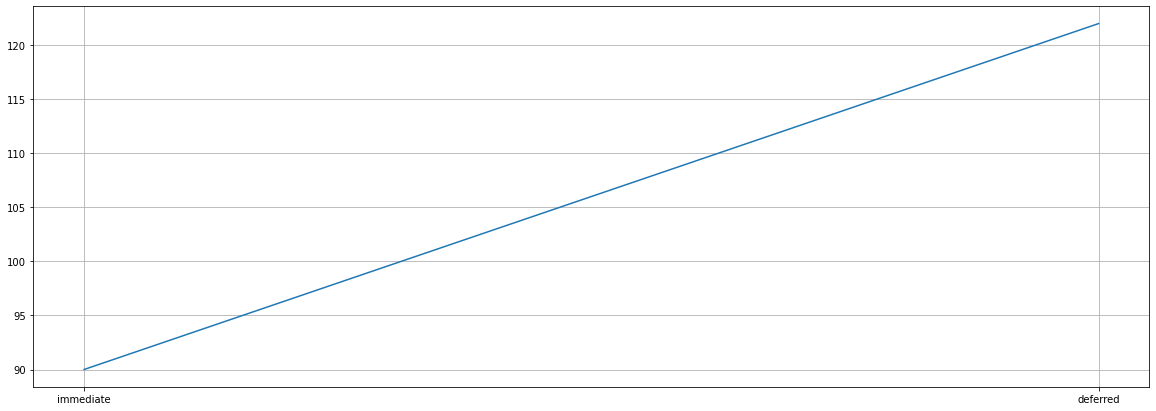

In [83]:
updating = ['immediate', 'deferred']
result.nit = [90, 122]
plt.figure(figsize=(20,7))
#plt.plot(updating)
#plt.plot(result.nit)
plt.plot(updating, result.nit)
plt.grid()
plt.show()

In [132]:
min_result_nit_updating = 'immediate'